# Predicting Industrial Machine Downtime: Level 3

## 📖 Background
You work for a manufacturer of high-precision metal components used in aerospace, automotives, and medical device applications. Your company operates three different machines on its shop floor that produce different sized components, so minimizing the downtime of these machines is vital for meeting production deadlines.

Your team wants to use a data-driven approach to predicting machine downtime, so proactive maintenance can be planned rather than being reactive to machine failure. To support this, your company has been collecting operational data for over a year and whether each machine was down at those times.

In this third level, you're going to develop a predictive model that could be combined with real-time operational data to detect likely machine failure. This level is aimed towards advanced learners. If you want to challenge yourself a bit less, check out the other levels!

## 💾 The data

The company has stored the machine operating data in a single table, available in `'data/machine_downtime.csv'`.

#### Each row in the table represents the operational data for a single machine on a given day:
- `"Date"` - the date the reading was taken on.
- `"Machine_ID"` - the unique identifier of the machine being read.
- `"Assembly_Line_No"` - the unique identifier of the assembly line the machine is located on.
- `"Hydraulic_Pressure(bar)"`, `"Coolant_Pressure(bar)"`, and `"Air_System_Pressure(bar)"` - pressure measurements at different points in the machine.
- `"Coolant_Temperature"`, `"Hydraulic_Oil_Temperature"`, and `"Spindle_Bearing_Temperature"` - temperature measurements (in Celsius) at different points in the machine.
- `"Spindle_Vibration"`, `"Tool_Vibration"`, and `"Spindle_Speed(RPM)"` - vibration (measured in micrometers) and rotational speed measurements for the spindle and tool.
- `"Voltage(volts)"` - the voltage supplied to the machine.
- `"Torque(Nm)"` - the torque being generated by the machine.
- `"Cutting(KN)"` - the cutting force of the tool.
- `"Downtime"` - an indicator of whether the machine was down or not on the given day.

## 💪 Competition challenge

Create a report that covers the following:
1. Train and evaluate a predictive model to predict machine failure.
2. Which dataset features are the strongest predictors of machine failure?
3. Are your predictions more accurate if you model each machine separately?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

In [ ]:
# install necessary libraries
# !pip install sweetviz
# !pip install numpy --upgrade numpy
# !pip install ydata-profiling
# !pip install catboost
# !pip install xgboost
# !pip install scikit-optimize

In [1]:
# import necessary libraries
from ydata_profiling import ProfileReport
import my_functions as mf
import joblib
import pandas as pd
from my_functions import split_by_machine_type, feature_importance_diff_machines
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
downtime = pd.read_csv('data/machine_downtime.csv')
downtime.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [3]:
downtime.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


## EDA

In [4]:
# prep data for EDA
downtime = mf.prep_for_eda(downtime)

In [5]:
downtime.head()

,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime,month_sin,month_cos
0,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure,-2.449294e-16,1.000000e+00
1,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure,-2.449294e-16,1.000000e+00
2,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure,-2.449294e-16,1.000000e+00
3,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure,5.000000e-01,-8.660254e-01
4,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure,1.000000e+00,6.123234e-17


In [ ]:
# generate HTML file for cursory EDA
profile = ProfileReport(downtime, title = "Profile Report")
profile.to_file("EDA.html")

In [ ]:
# compare class distributions for the Target Variable: Downtime
class_failure = ProfileReport(downtime.loc[downtime['Downtime'] == "Machine_Failure"], title = "Machine Failure")
class_no_failure = ProfileReport(downtime.loc[downtime['Downtime'] == "No_Machine_Failure"], title = "No Machine Failure")

comparison_report = class_failure.compare(class_no_failure)
comparison_report.to_file("Target_Class_Comparison.html")

## Preliminary Findings

#### Correlation

- Downtime is highly correlated with: Coolant Pressure, Cutting, Hydraulic Pressure, Spindle Speed, and Torque.
- The distributions of the above features vary signficantly by value of Downtime

#### Distribution
- Air System Pressure, Hydraulic Oil Temperature, Spindle Bearing Temperature, Spindle Vibration, Tool Vibration, and Voltage seem to be normally distributed.

#### Class Imbalance
- The target Downtime is balanced almost 50% per class.

#### Missing Values
- There are several missing values. Coolant Temperature seems to be missing when Coolant Temperature or Coolant Pressure is missing.
- There are many more missing values for the above fields when there is No Machine Failure than when there is one.


# Run Models and CV

In [6]:
# split data into predictors and target
X, y = mf.split_data(downtime)


## Random Forest

In [ ]:
# print the best parameters
# rf_metrics, best_rf, X_adj, y_adj = mf.get_best_params_and_score("RandomForest", X, y)
# rf_metrics

In [7]:
# load the best model
best_rf = joblib.load('outputs/BestRandomForest.pkl')
X_rf = joblib.load('outputs/X_RandomForest.pkl')
y_rf = joblib.load('outputs/y_RandomForest.pkl')
rf_metrics = joblib.load('outputs/metricsRandomForest.pkl')


In [8]:
best_rf

RandomForestClassifier(max_depth=16, max_features=5, min_samples_split=3,
                       n_estimators=498, random_state=42)

In [9]:
rf_metrics

{'Best Parameters': OrderedDict([('max_depth', 16),
              ('max_features', 5),
              ('min_samples_split', 3),
              ('n_estimators', 498)]),
 'Best Model Average Test Accuracy': 0.9784,
 'Best Model Average Test Balanced Accuracy': 0.9785601126562226,
 'Best Model Average Test F1-Score': 0.978879677068662}

Feature Importances (sorted):
                        Feature  Importance
11                   Torque(Nm)    0.280177
1       Hydraulic_Pressure(bar)    0.247904
12                  Cutting(kN)    0.211771
2         Coolant_Pressure(bar)    0.152570
9            Spindle_Speed(RPM)    0.056726
4           Coolant_Temperature    0.016741
6   Spindle_Bearing_Temperature    0.005590
8                Tool_Vibration    0.005402
7             Spindle_Vibration    0.004987
5     Hydraulic_Oil_Temperature    0.004403
3      Air_System_Pressure(bar)    0.004014
10               Voltage(volts)    0.003906
13                    month_sin    0.003434
14                    month_cos    0.001724
0                    Machine_ID    0.000651


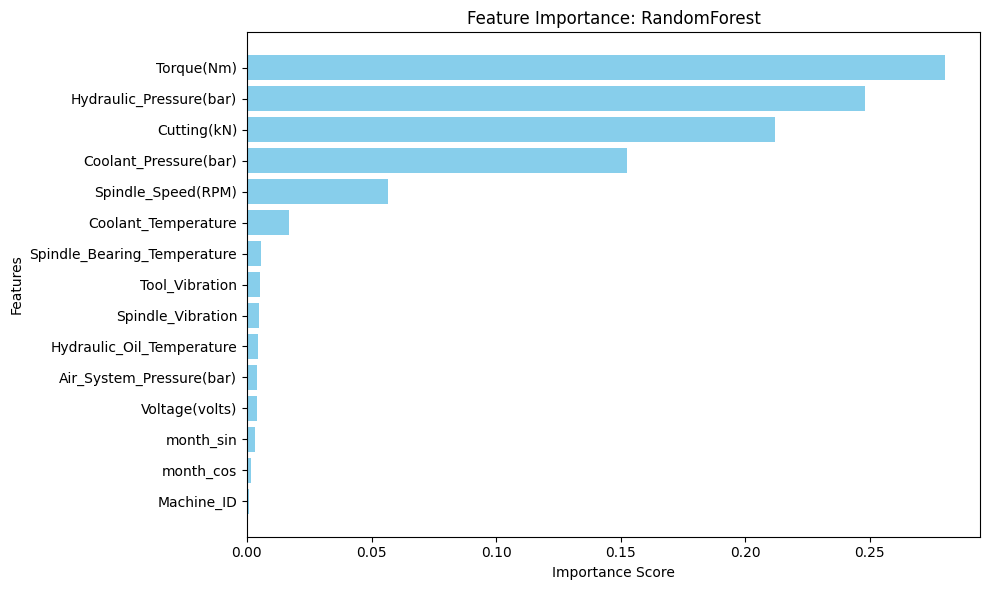

,Feature,Importance
11,Torque(Nm),0.280177
1,Hydraulic_Pressure(bar),0.247904
12,Cutting(kN),0.211771
2,Coolant_Pressure(bar),0.152570
9,Spindle_Speed(RPM),0.056726
4,Coolant_Temperature,0.016741
6,Spindle_Bearing_Temperature,0.005590
8,Tool_Vibration,0.005402
7,Spindle_Vibration,0.004987
5,Hydraulic_Oil_Temperature,0.004403


In [10]:
# feature importances
mf.feature_importance("RandomForest", X_rf, y_rf, best_rf)

## XGBoost

In [ ]:
# xgboost best parameters
# xgb_metrics, best_xgb, X_adj, y_adj = mf.get_best_params_and_score("XGBoost", X, y)

In [11]:
# load the best model
best_xgb = joblib.load('outputs/BestXGBoost.pkl')
X_gbm = joblib.load('outputs/X_XGBoost.pkl')
y_gbm = joblib.load('outputs/y_XGboost.pkl')
xgb_metrics = joblib.load('outputs/metricsXGBoost.pkl')

In [12]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.26532271605927604, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=394, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [13]:
xgb_metrics

{'Best Parameters': OrderedDict([('colsample_bytree', 0.5),
              ('learning_rate', 0.26532271605927604),
              ('max_depth', 15),
              ('n_estimators', 394)]),
 'Best Model Average Test Accuracy': 0.9892,
 'Best Model Average Test Balanced Accuracy': 0.9891456462319252,
 'Best Model Average Test F1-Score': 0.9894292138262628}

Feature Importances (sorted):
                        Feature  Importance
1       Hydraulic_Pressure(bar)    0.293966
11                   Torque(Nm)    0.241188
2         Coolant_Pressure(bar)    0.195127
12                  Cutting(kN)    0.062729
14                    month_cos    0.058911
9            Spindle_Speed(RPM)    0.054395
13                    month_sin    0.028075
4           Coolant_Temperature    0.020328
5     Hydraulic_Oil_Temperature    0.013465
6   Spindle_Bearing_Temperature    0.007148
0                    Machine_ID    0.007037
8                Tool_Vibration    0.005990
3      Air_System_Pressure(bar)    0.005256
10               Voltage(volts)    0.003345
7             Spindle_Vibration    0.003040


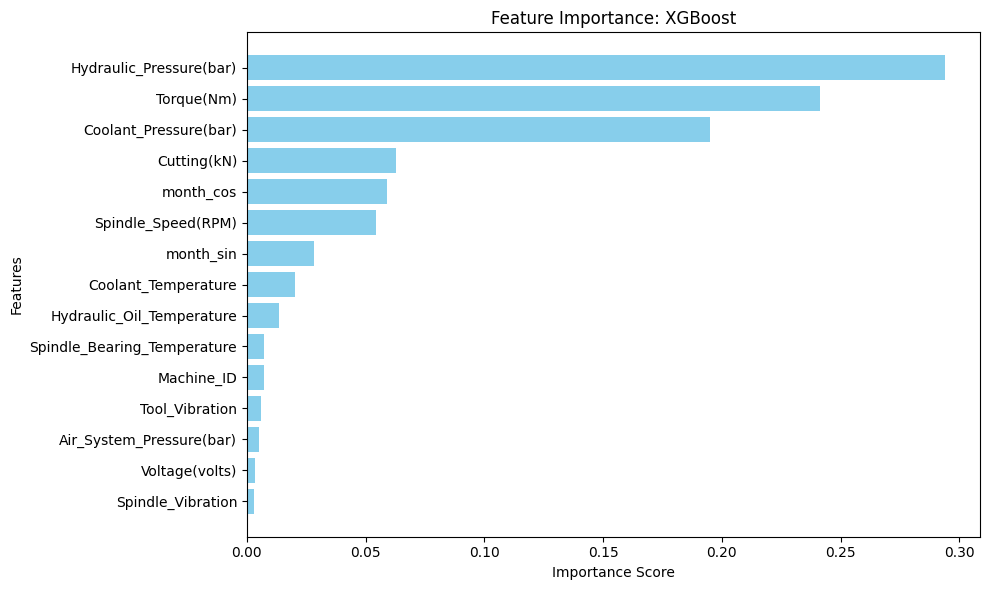

,Feature,Importance
1,Hydraulic_Pressure(bar),0.293966
11,Torque(Nm),0.241188
2,Coolant_Pressure(bar),0.195127
12,Cutting(kN),0.062729
14,month_cos,0.058911
9,Spindle_Speed(RPM),0.054395
13,month_sin,0.028075
4,Coolant_Temperature,0.020328
5,Hydraulic_Oil_Temperature,0.013465
6,Spindle_Bearing_Temperature,0.007148


In [14]:
# feature importances
mf.feature_importance("XGBoost", X_gbm, y_gbm, best_xgb)

## CatBoost

In [ ]:
# xgboost best parameters
# cat_metrics, best_cat, X_cat, y_cat = mf.get_best_params_and_score("CatBoost", X, y)


In [15]:
# load the best model
best_cat = joblib.load('outputs/BestCatBoost.pkl')
X_cat = joblib.load('outputs/X_CatBoost.pkl')
y_cat = joblib.load('outputs/y_Catboost.pkl')
cat_metrics = joblib.load('outputs/metricsCatBoost.pkl')

In [16]:
best_cat

In [17]:
cat_metrics

{'Best Parameters': OrderedDict([('depth', 3),
              ('iterations', 151),
              ('learning_rate', 0.23616512019431915)]),
 'Best Model Average Test Accuracy': 0.9872,
 'Best Model Average Test Balanced Accuracy': 0.987294170360532,
 'Best Model Average Test F1-Score': 0.9874000833458592}

Feature Importances (sorted):
                        Feature  Importance
11                   Torque(Nm)   50.035213
2         Coolant_Pressure(bar)   20.402211
12                  Cutting(kN)   16.644229
1       Hydraulic_Pressure(bar)    9.224810
9            Spindle_Speed(RPM)    1.439138
4           Coolant_Temperature    1.201451
14                    month_cos    0.330782
6   Spindle_Bearing_Temperature    0.257594
13                    month_sin    0.253581
5     Hydraulic_Oil_Temperature    0.073691
3      Air_System_Pressure(bar)    0.062789
8                Tool_Vibration    0.055681
10               Voltage(volts)    0.010308
7             Spindle_Vibration    0.008523
0                    Machine_ID    0.000000


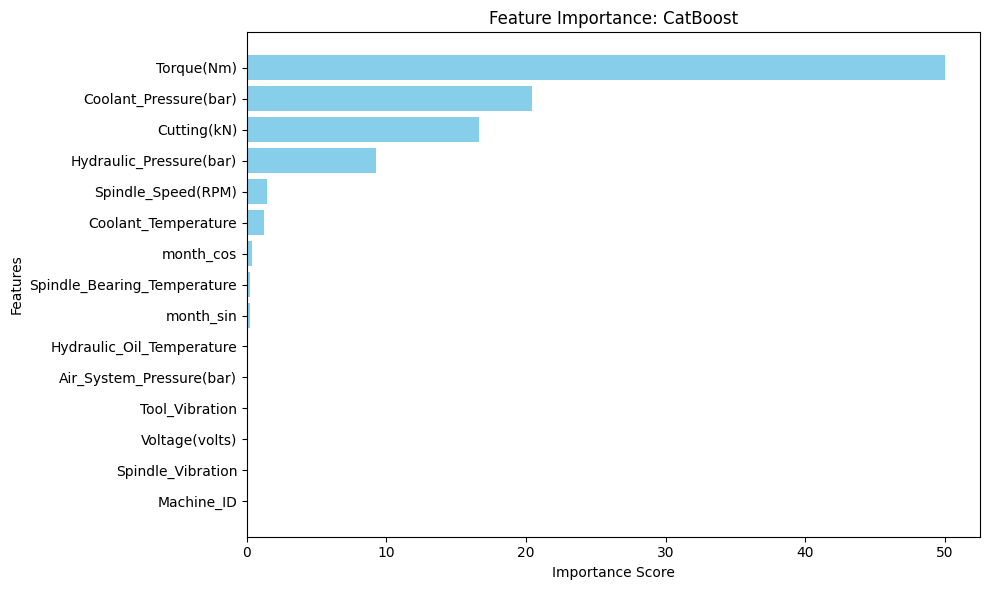

,Feature,Importance
11,Torque(Nm),50.035213
2,Coolant_Pressure(bar),20.402211
12,Cutting(kN),16.644229
1,Hydraulic_Pressure(bar),9.224810
9,Spindle_Speed(RPM),1.439138
4,Coolant_Temperature,1.201451
14,month_cos,0.330782
6,Spindle_Bearing_Temperature,0.257594
13,month_sin,0.253581
5,Hydraulic_Oil_Temperature,0.073691


In [18]:
# feature importances
mf.feature_importance("CatBoost", X_cat, y_cat, best_cat)

# By Machine

In [19]:
# split dataset by machine
downtime_l1, downtime_l2, downtime_l3 = split_by_machine_type(downtime)

X_l1, y_l1 = mf.split_data(downtime_l1)
X_l2, y_l2 = mf.split_data(downtime_l2)
X_l3, y_l3 = mf.split_data(downtime_l3)

## Random Forest

### L1

In [20]:
# return the metrics for RF
l1_rf_metrics, X_l1_rf, y_l1_rf = mf.get_score_diff_machines("RandomForest", best_rf, X_l1, y_l1)

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9691231527093596
Best Model Average Test Balanced Accuracy: 0.9694017094017096
Best Model Average Test F1-Score: 0.9689958070332672


Feature Importances (sorted):
                        Feature  Importance
11                   Torque(Nm)    0.253982
1       Hydraulic_Pressure(bar)    0.253429
12                  Cutting(kN)    0.220111
2         Coolant_Pressure(bar)    0.142122
9            Spindle_Speed(RPM)    0.060190
4           Coolant_Temperature    0.016648
7             Spindle_Vibration    0.009783
8                Tool_Vibration    0.009120
5     Hydraulic_Oil_Temperature    0.008463
6   Spindle_Bearing_Temperature    0.008185
3      Air_System_Pressure(bar)    0.007533
10               Voltage(volts)    0.005388
14                    month_cos    0.002568
13                    month_sin    0.002477
0                    Machine_ID    0.000000


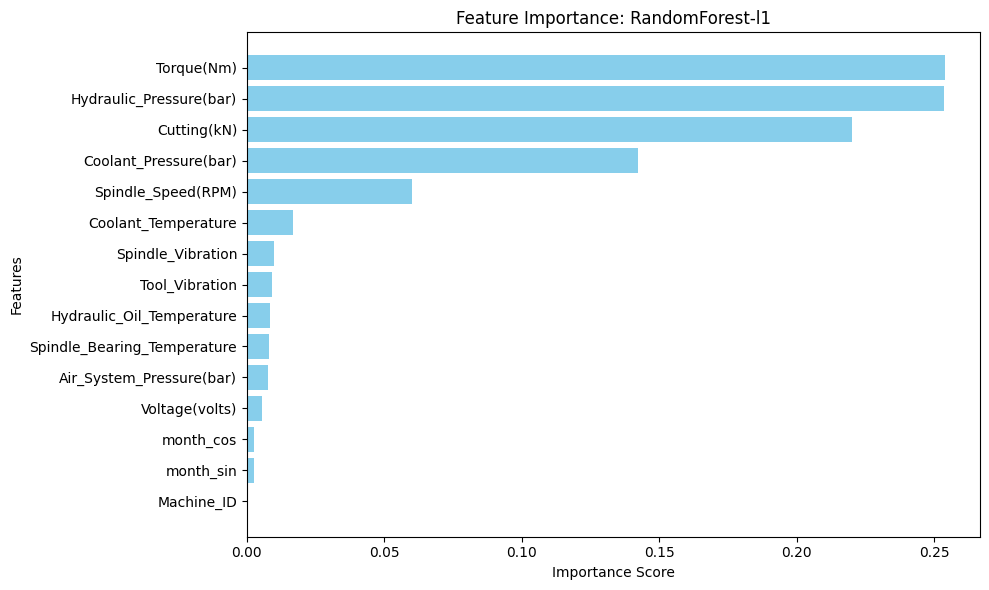

In [21]:
# print the RF feature importances for RF
feature_importance_diff_machines("RandomForest", X_l1_rf, y_l1_rf, best_rf, "l1")

### L2

In [22]:
# return metrics for RF
l2_rf_metrics, X_l2_rf, y_l2_rf = mf.get_score_diff_machines("RandomForest", best_rf, X_l2, y_l2 )

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9629246223449123
Best Model Average Test Balanced Accuracy: 0.9628974201839776
Best Model Average Test F1-Score: 0.9640308855024575


Feature Importances (sorted):
                        Feature  Importance
1       Hydraulic_Pressure(bar)    0.256394
12                  Cutting(kN)    0.237886
11                   Torque(Nm)    0.228983
2         Coolant_Pressure(bar)    0.137824
9            Spindle_Speed(RPM)    0.053777
4           Coolant_Temperature    0.034191
6   Spindle_Bearing_Temperature    0.008348
10               Voltage(volts)    0.008133
8                Tool_Vibration    0.007908
7             Spindle_Vibration    0.007838
5     Hydraulic_Oil_Temperature    0.007024
3      Air_System_Pressure(bar)    0.006484
13                    month_sin    0.002990
14                    month_cos    0.002219
0                    Machine_ID    0.000000


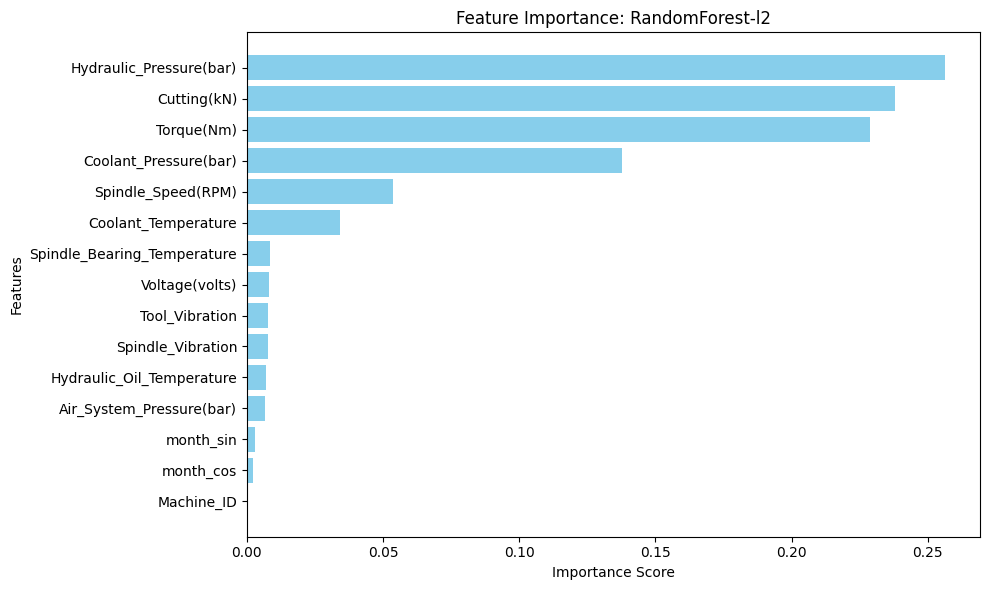

In [23]:
# print feature importances
feature_importance_diff_machines("RandomForest", X_l2_rf, y_l2_rf, best_rf, "l2")

### L3

In [24]:
# return metrics for RF
l3_rf_metrics, X_l3_rf, y_l3_rf = mf.get_score_diff_machines("RandomForest", best_rf, X_l3, y_l3)

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9682627562471943
Best Model Average Test Balanced Accuracy: 0.9683452327829837
Best Model Average Test F1-Score: 0.9687626524196332


Feature Importances (sorted):
                        Feature  Importance
11                   Torque(Nm)    0.288997
1       Hydraulic_Pressure(bar)    0.237894
12                  Cutting(kN)    0.197309
2         Coolant_Pressure(bar)    0.145706
9            Spindle_Speed(RPM)    0.056943
4           Coolant_Temperature    0.017981
6   Spindle_Bearing_Temperature    0.010584
5     Hydraulic_Oil_Temperature    0.009506
8                Tool_Vibration    0.008288
10               Voltage(volts)    0.008057
7             Spindle_Vibration    0.007557
3      Air_System_Pressure(bar)    0.005850
14                    month_cos    0.002720
13                    month_sin    0.002607
0                    Machine_ID    0.000000


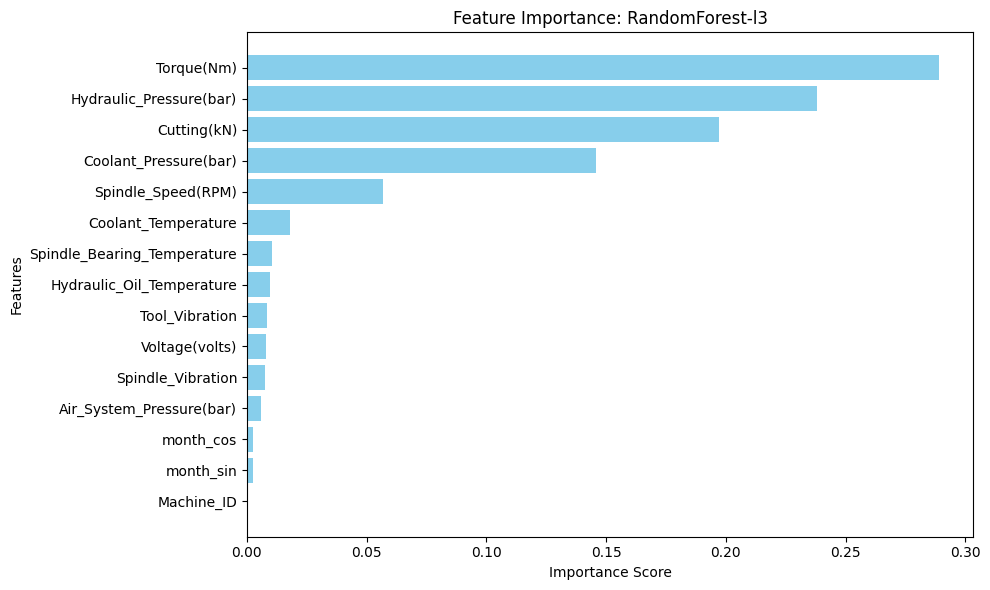

In [25]:
# print feature importances
feature_importance_diff_machines("RandomForest", X_l3_rf, y_l3_rf, best_rf, "l3")

## XGBoost

### L1

In [26]:
# return metrics for XGB
l1_xgb_metrics, X_l1_xgb, y_l1_xgb = mf.get_score_diff_machines("XGBoost", best_xgb, X_l1, y_l1)

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9817011494252874
Best Model Average Test Balanced Accuracy: 0.9814673971112471
Best Model Average Test F1-Score: 0.9804268292682927


Feature Importances (sorted):
                        Feature  Importance
1       Hydraulic_Pressure(bar)    0.304403
12                  Cutting(kN)    0.194488
11                   Torque(Nm)    0.138652
2         Coolant_Pressure(bar)    0.137232
14                    month_cos    0.114709
9            Spindle_Speed(RPM)    0.033603
13                    month_sin    0.017218
4           Coolant_Temperature    0.012739
5     Hydraulic_Oil_Temperature    0.011100
10               Voltage(volts)    0.010622
6   Spindle_Bearing_Temperature    0.008789
8                Tool_Vibration    0.006827
3      Air_System_Pressure(bar)    0.006143
7             Spindle_Vibration    0.003475
0                    Machine_ID    0.000000


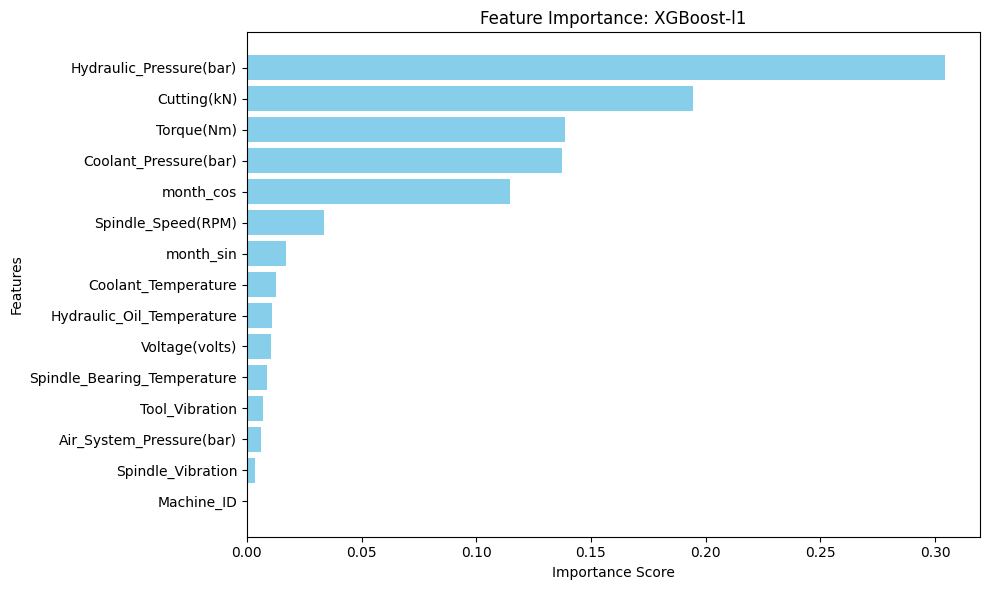

In [27]:
# print feature importances
feature_importance_diff_machines("XGBoost", X_l1_xgb, y_l1_xgb, best_xgb, "l1")

### L2

In [28]:
# return metrics fo XGB
l2_xgb_metrics, X_l2_xgb, y_l2_xgb = mf.get_score_diff_machines("XGBoost", best_xgb, X_l2, y_l2)

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9678858983206808
Best Model Average Test Balanced Accuracy: 0.9683314098370868
Best Model Average Test F1-Score: 0.9688271151164234


Feature Importances (sorted):
                        Feature  Importance
1       Hydraulic_Pressure(bar)    0.320914
2         Coolant_Pressure(bar)    0.148713
12                  Cutting(kN)    0.146351
11                   Torque(Nm)    0.145535
14                    month_cos    0.063772
9            Spindle_Speed(RPM)    0.059065
13                    month_sin    0.040283
4           Coolant_Temperature    0.016275
3      Air_System_Pressure(bar)    0.015559
5     Hydraulic_Oil_Temperature    0.014623
6   Spindle_Bearing_Temperature    0.011301
8                Tool_Vibration    0.009126
7             Spindle_Vibration    0.005585
10               Voltage(volts)    0.002898
0                    Machine_ID    0.000000


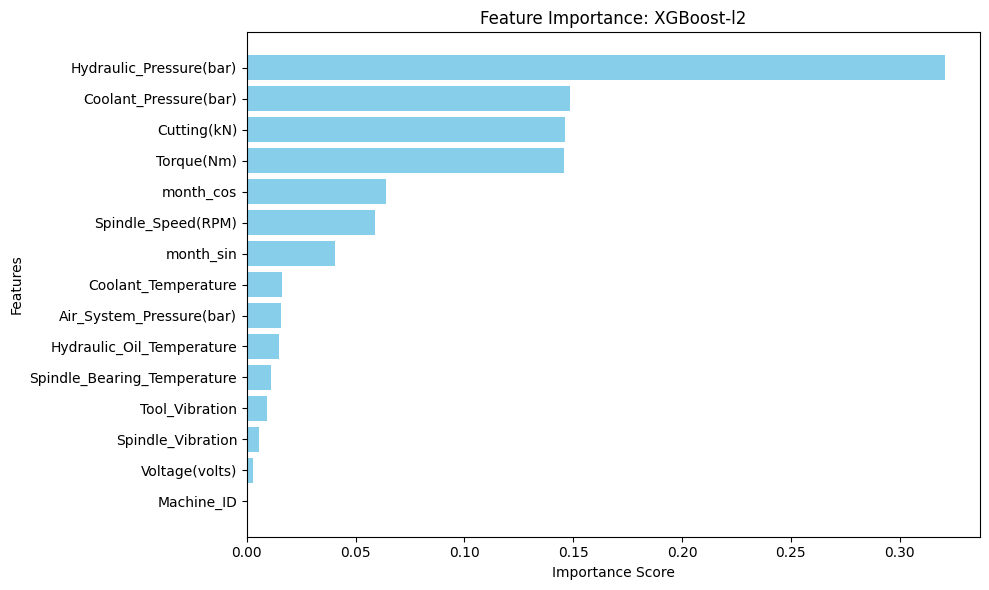

In [29]:
# print feature importances
feature_importance_diff_machines("XGBoost", X_l2_xgb, y_l2_xgb, best_xgb, "l2")

### L3

In [30]:
# return metrics for XGB
l3_xgb_metrics, X_l3_xgb, y_l3_xgb = mf.get_score_diff_machines("XGBoost",best_xgb, X_l3, y_l3)

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9755873110878348
Best Model Average Test Balanced Accuracy: 0.975807401405422
Best Model Average Test F1-Score: 0.9766677219023947


Feature Importances (sorted):
                        Feature  Importance
1       Hydraulic_Pressure(bar)    0.305988
11                   Torque(Nm)    0.212072
2         Coolant_Pressure(bar)    0.192925
9            Spindle_Speed(RPM)    0.080750
12                  Cutting(kN)    0.055788
13                    month_sin    0.046588
14                    month_cos    0.042849
5     Hydraulic_Oil_Temperature    0.019501
4           Coolant_Temperature    0.009736
6   Spindle_Bearing_Temperature    0.009686
7             Spindle_Vibration    0.007533
10               Voltage(volts)    0.006556
3      Air_System_Pressure(bar)    0.005360
8                Tool_Vibration    0.004668
0                    Machine_ID    0.000000


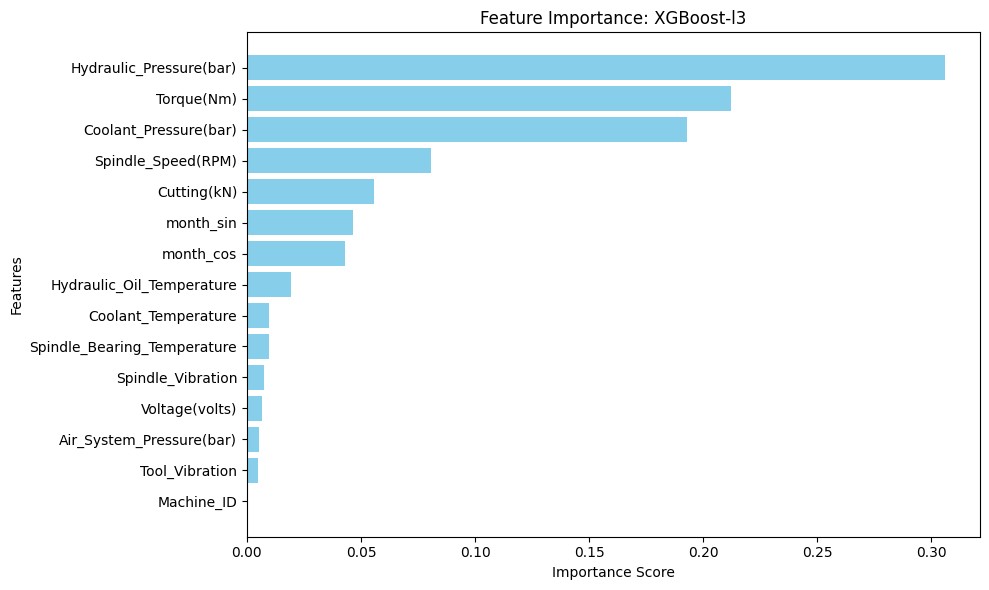

In [31]:
# print feature importances
feature_importance_diff_machines("XGBoost", X_l3_xgb, y_l3_xgb, best_xgb, "l3")

## CatBoost

### L1

In [32]:
# return metrics for CATBoost
l1_cat_metrics, X_l1_cat, y_l1_cat = mf.get_score_diff_machines("CatBoost", best_cat, X_l1, y_l1)

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9794285714285713
Best Model Average Test Balanced Accuracy: 0.9797619047619047
Best Model Average Test F1-Score: 0.9793879966187659


Feature Importances (sorted):
                        Feature  Importance
11                   Torque(Nm)   54.804912
2         Coolant_Pressure(bar)   20.409429
12                  Cutting(kN)   11.597973
1       Hydraulic_Pressure(bar)   10.973285
9            Spindle_Speed(RPM)    1.677798
4           Coolant_Temperature    0.312951
6   Spindle_Bearing_Temperature    0.089189
3      Air_System_Pressure(bar)    0.053195
8                Tool_Vibration    0.048196
7             Spindle_Vibration    0.031052
5     Hydraulic_Oil_Temperature    0.002020
0                    Machine_ID    0.000000
10               Voltage(volts)    0.000000
13                    month_sin    0.000000
14                    month_cos    0.000000


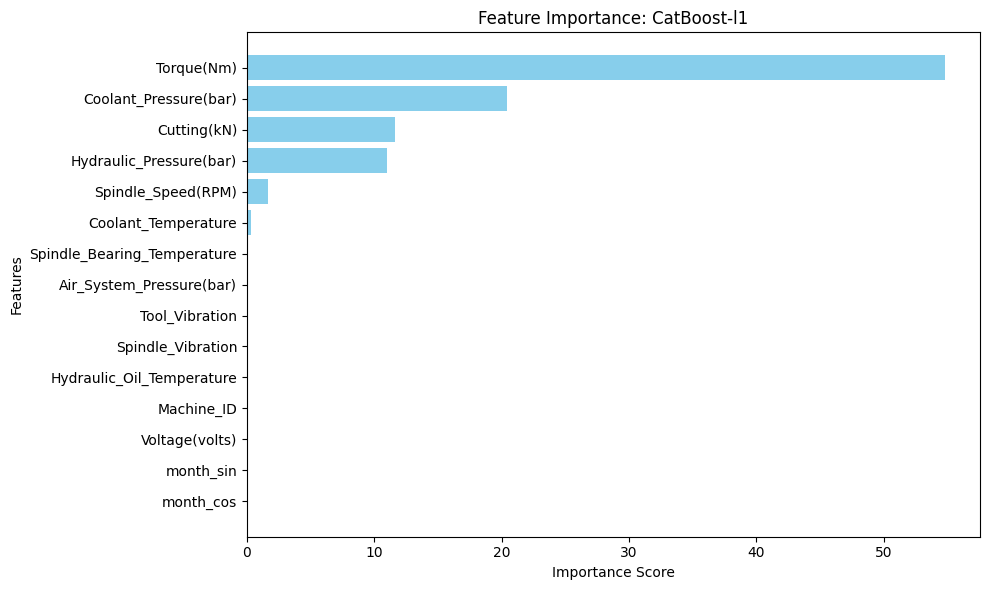

In [33]:
# feature importances
feature_importance_diff_machines("CatBoost", X_l1_cat, y_l1_cat, best_cat, "l1")

### L2

In [34]:
# return metrics for CATBoost
l2_cat_metrics, X_l2_cat, y_l2_cat = mf.get_score_diff_machines("CatBoost", best_cat, X_l2, y_l2)

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9789970094317921
Best Model Average Test Balanced Accuracy: 0.9787566443607092
Best Model Average Test F1-Score: 0.9802647176754615


Feature Importances (sorted):
                        Feature  Importance
11                   Torque(Nm)   43.990030
12                  Cutting(kN)   25.161133
2         Coolant_Pressure(bar)   18.123532
1       Hydraulic_Pressure(bar)   11.071124
9            Spindle_Speed(RPM)    0.900275
4           Coolant_Temperature    0.344068
6   Spindle_Bearing_Temperature    0.288135
14                    month_cos    0.090891
10               Voltage(volts)    0.029522
13                    month_sin    0.001290
0                    Machine_ID    0.000000
3      Air_System_Pressure(bar)    0.000000
5     Hydraulic_Oil_Temperature    0.000000
7             Spindle_Vibration    0.000000
8                Tool_Vibration    0.000000


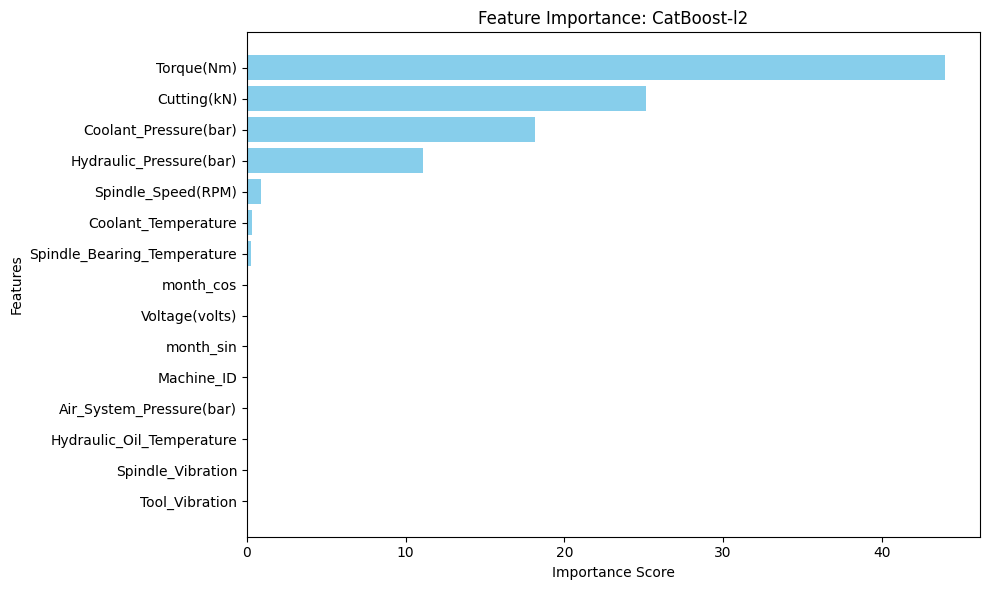

In [35]:
# feature importances
feature_importance_diff_machines("CatBoost", X_l2_cat, y_l2_cat, best_cat, "l2")

### L3

In [36]:
# return metrics for CATBoost
l3_cat_metrics, X_l3_cat, y_l3_cat = mf.get_score_diff_machines("CatBoost", best_cat, X_l3, y_l3)

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9816848720634445
Best Model Average Test Balanced Accuracy: 0.9817029228023204
Best Model Average Test F1-Score: 0.9816323551156623


Feature Importances (sorted):
                        Feature  Importance
11                   Torque(Nm)   54.190884
2         Coolant_Pressure(bar)   19.174027
12                  Cutting(kN)   12.893444
1       Hydraulic_Pressure(bar)   10.690015
9            Spindle_Speed(RPM)    2.191450
13                    month_sin    0.333902
4           Coolant_Temperature    0.326912
8                Tool_Vibration    0.097198
10               Voltage(volts)    0.051232
7             Spindle_Vibration    0.040307
6   Spindle_Bearing_Temperature    0.009318
5     Hydraulic_Oil_Temperature    0.001311
0                    Machine_ID    0.000000
3      Air_System_Pressure(bar)    0.000000
14                    month_cos    0.000000


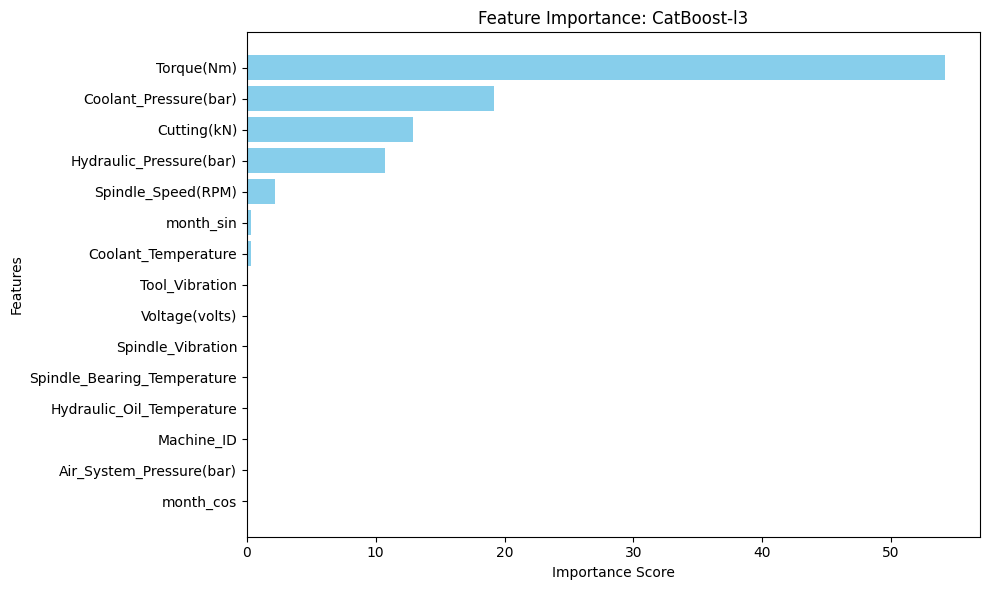

In [37]:
# feature importances
feature_importance_diff_machines("CatBoost", X_l3_cat, y_l3_cat, best_cat, "l3")